In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Pipeline
from tree import TreeModel

# ===== import data; tr,ts ======
X_tr = pd.read_csv('split-data/processed/X_tr.csv')
X_ts = pd.read_csv('split-data/processed/X_ts.csv')
y_tr = pd.read_csv('split-data/processed/y_tr.csv')
y_ts = pd.read_csv('split-data/processed/y_ts.csv')

In [2]:
# ===== Decision Tree ======
start = time.time()

dt_params = {
    'X_tr': X_tr.to_numpy(),
    'X_ts': X_ts.to_numpy(),
    'y_tr': y_tr.to_numpy(),
    'y_ts': y_ts.to_numpy(),
    'model': DecisionTreeClassifier(),
    'name': 'Decision Tree'
}

dt_pipeline = TreeModel(**dt_params)

dt_fit_params = {
    'param_grid': {
        'max_depth': [2, 3, 5, 10, 20, 50, 75, 100],
        'min_samples_leaf': [1, 5, 10, 20, 50],
        'min_samples_split': [2, 5, 10, 20],
    },
    'balance_classes': True,
    'k_folds': 5,
    'scoring': 'accuracy'
}

dt_pipeline.fit_predict(**dt_fit_params)

end = time.time()
elapsed = end - start
print(f"Elapsed time: {elapsed:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Elapsed time: 28.13 seconds


In [3]:
dt_pipeline.tr_ts_scoring

DecisionTreeClassifier(class_weight='balanced')
Grid - Hyperparameters: ['max_depth', 'min_samples_leaf', 'min_samples_split']
Train Accuracy: 99.821%
CV Validation Accuracy: 80.688%
Test Accuracy: 25.956%


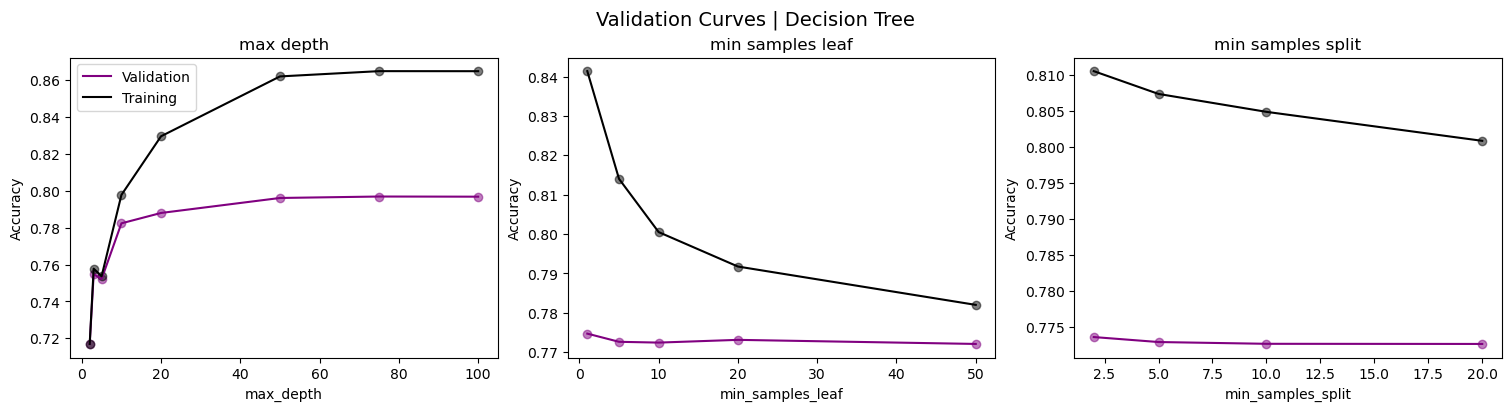

In [4]:
plot_vhgr_params = {
    'param_list':dt_pipeline.hyper_grid,
    'figsize':(5, 4),
    'save_path':'media/02_dt_val_grid_row.png'
}
dt_pipeline.plot_validation_hyperparam_grid_row(**plot_vhgr_params)

``` ['max_depth','min_samples_split']``` 
= features with overfitting properties. 

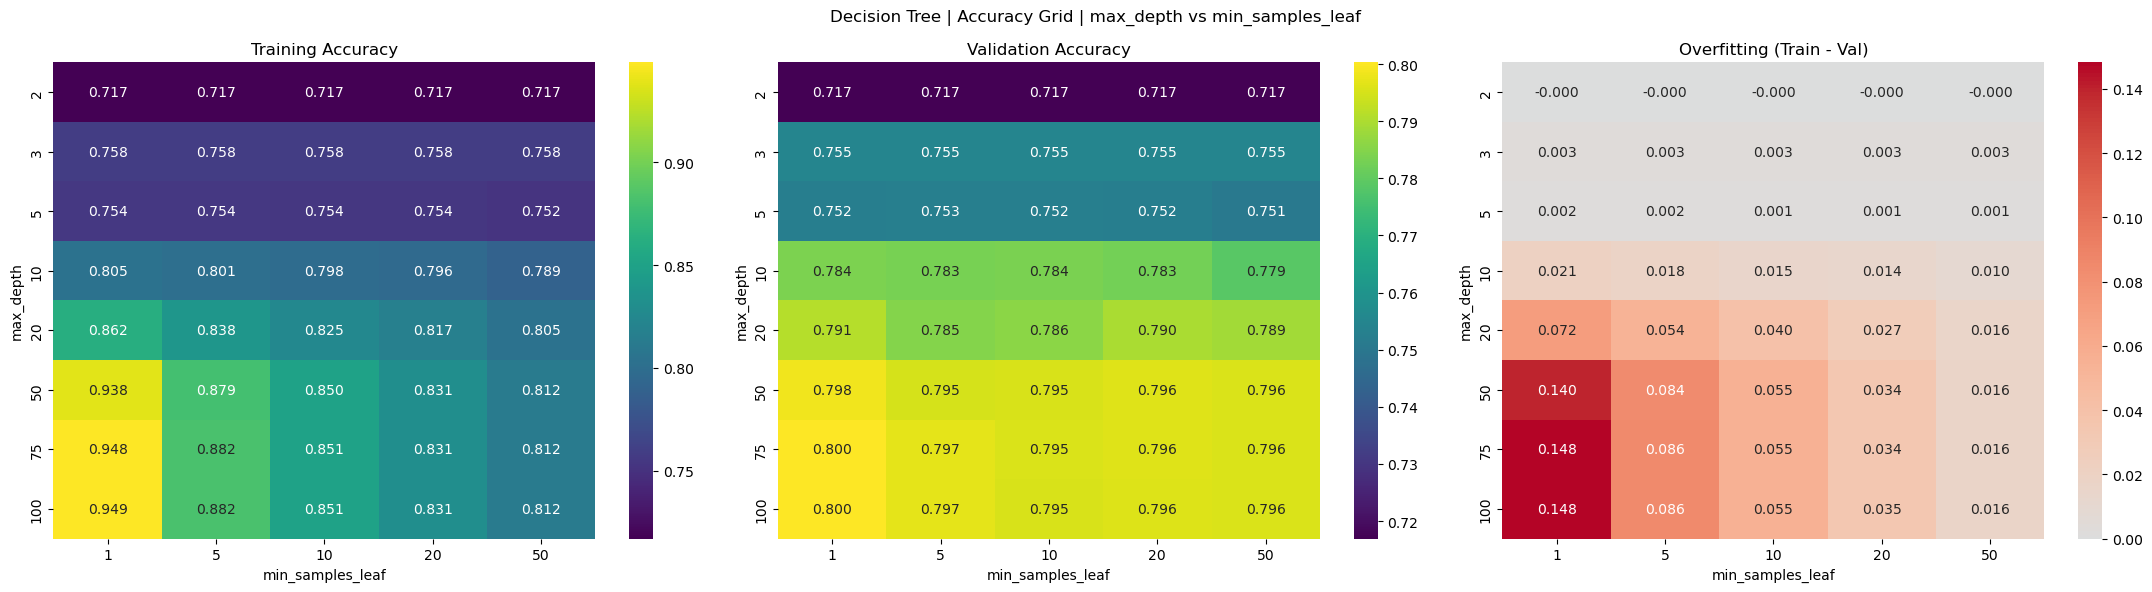

In [10]:
dt_pipeline.viz_heatmap_cv(['max_depth','min_samples_leaf'])

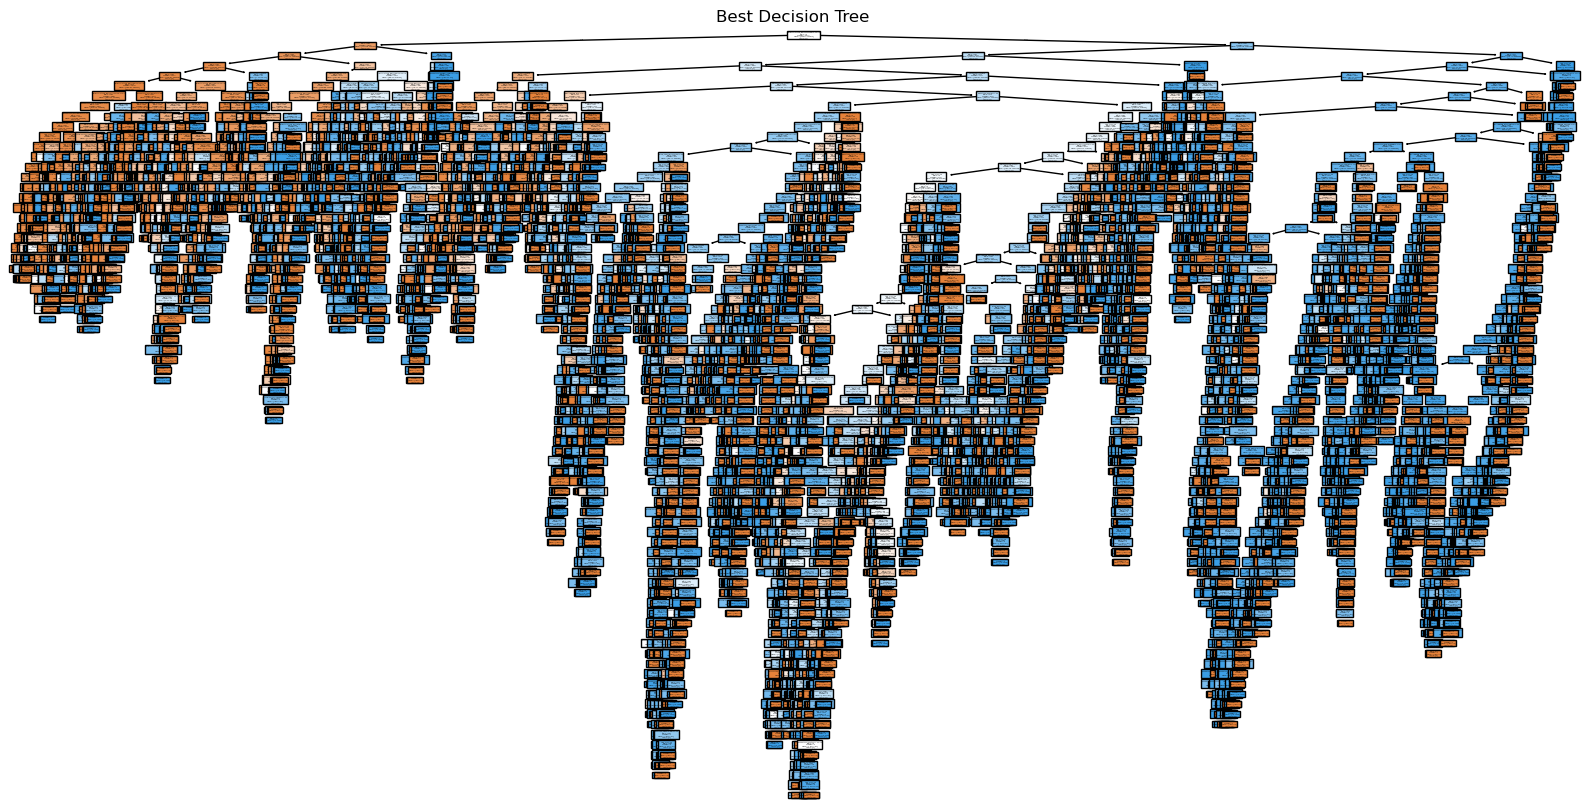

In [11]:
best_tree = dt_pipeline.grid.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X_tr.columns, class_names=True, filled=True)
plt.title("Best Decision Tree")
plt.savefig('media/02_dt_tree_viz')
plt.show()

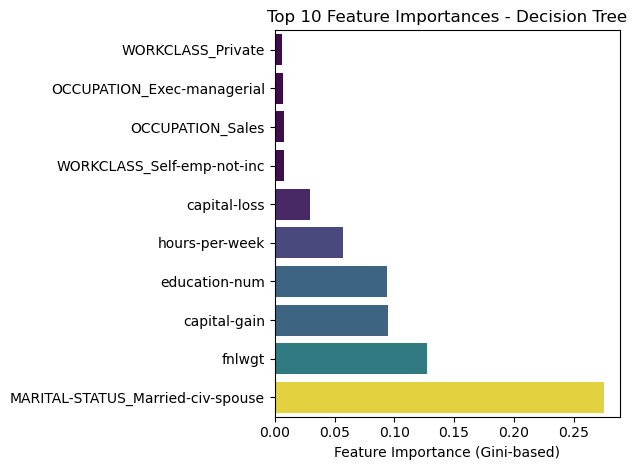

In [12]:
k = 10
tree_importances = pd.Series(best_tree.feature_importances_, index=X_tr.columns)
top_features = tree_importances.sort_values(ascending=False).head(k)

sns.barplot(
    x=top_features.sort_values().values,
    y=top_features.sort_values().index,
    hue=top_features.sort_values().values,
    dodge=False,
    palette='viridis',
    legend=False
)

plt.title(f"Top {k} Feature Importances - Decision Tree")
plt.xlabel("Feature Importance (Gini-based)")
plt.ylabel('')
plt.tight_layout()
plt.savefig('media/02_dt_sig_features')
plt.show()